# Modulo 1 - BancoEstado
- Regresión y clasificación lineal
- Mínimos cuadrados regularizados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Regresión Lineal

__Modelo:__ $$y = \alpha + \beta x + \epsilon$$
__Funcion objetivo:__ $$S = \sum_{i=1}^{n}\epsilon_i^2 = \sum_{i=1}^{n}(y_i - \alpha - \beta x_i)^2$$
$$= \sum_{i=1}^{n}\left(y_i - \begin{bmatrix} 1 & x_i \end{bmatrix} \begin{bmatrix} \alpha \\ \beta \end{bmatrix}\right)^2$$
__Solución:__
$$X = \begin{bmatrix} 1 & 1 & 1 & \dots & 1 \\ x_0 & x_1 & x_2 & \dots & x_n\end{bmatrix}$$
$$\theta = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = (X^T X)^{-1} X^T y$$

In [14]:
# Carga los datos
data = np.loadtxt('crickets.csv', delimiter=',', skiprows=1)
x = data[:, 0]
y = data[:, 1]

In [15]:
# Anteponer una fila de unos
X = np.array([np.ones(len(x)), x]).T
print(X)

[[ 1.         20.        ]
 [ 1.         16.        ]
 [ 1.         19.79999924]
 [ 1.         18.39999962]
 [ 1.         17.10000038]
 [ 1.         15.5       ]
 [ 1.         14.69999981]
 [ 1.         17.10000038]
 [ 1.         15.39999962]
 [ 1.         16.20000076]
 [ 1.         15.        ]
 [ 1.         17.20000076]
 [ 1.         16.        ]
 [ 1.         17.        ]
 [ 1.         14.39999962]]


In [26]:
# Obtener la solución de regresión lineal
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('Intersept:', theta[0])
print('Slope:', theta[1])
print('Error:', ((y - X.dot(theta))**2).sum())

Intersept: 25.2323049834268
Slope: 3.291094567947523
Error: 190.5473894234707


In [27]:
# Calcular la línea con nuestros parametros
x_reg = np.linspace(start=14, stop=20, num=20)
X_reg = np.array([np.ones(len(x_reg)), x_reg]).T
y_reg = X_reg.dot(theta)

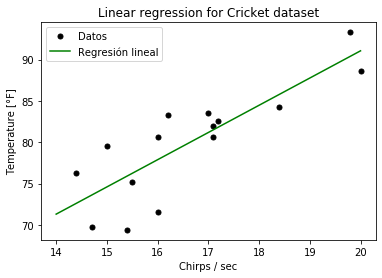

In [28]:
# Mostrar los datos y la regresión
plt.plot(x, y, 'o', c='black', ms=5, label='Datos')
plt.plot(x_reg, y_reg, c='green', label='Regresión lineal')
plt.legend()
plt.xlabel('Chirps / sec')
plt.ylabel('Temperature [°F]')
plt.title('Linear regression for Cricket dataset')
plt.show()

## $\phi$ Modificable
Consideramos una función $\phi(x): \mathbb{R}^D \to \mathbb{R}^2$ que transforme nuestras entradas hasta una matriz tamaño $N$x$M$, con $N$ los datos y $M$ el número de parametros.

$$X = \phi(x)$$

También vamos a reemplazar `np.linalg.inv` a una forma más estable. Dada $\theta = (X^T X)^{-1} X^T y$, tomar el  inverso puede ser complicado por errores numéricos. En vez de $(X^T X)^{-1} X^T \equiv W$ escribimos $(X^T X) W = X^T$ que podemos resolver con $W = \textrm{np.linalg.solve}(X^T X, X^T)$, resultando en $\theta = W y$.

Theta: [ 9.35008272e+02 -1.57591585e+02  9.42090205e+00 -1.82635440e-01]
Error: 184.40082567847844


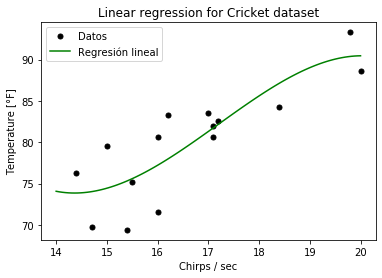

In [236]:
# Definir la función 𝜙
def phi(x):
    return np.array([
        np.ones(len(x)), x, x**2, x**3  # será A + B*x + C*x^2 + D*x^3
    ]).T

# Obtener la solución de regresión lineal
X = phi(x)
theta = np.linalg.solve(X.T.dot(X), X.T).dot(y)
print('Theta:', theta)
print('Error:', ((y - X.dot(theta))**2).sum())

# Mostrar la regresión
x_reg = np.linspace(14, 20, 100)
y_reg = phi(x_reg).dot(theta)
                                              
plt.plot(x, y, 'o', c='black', ms=5, label='Datos')
plt.plot(x_reg, y_reg, c='green', label='Regresión lineal')
plt.legend()
plt.xlabel('Chirps / sec')
plt.ylabel('Temperature [°F]')
plt.title('Linear regression for Cricket dataset')
plt.show()

theta_ordinario = theta

## Minimus Cuadrados Regularizados ($p=2$)

$$S = \frac{1}{2} \sum_{i=0}^n \left( y_i - \theta^T x_i \right)^2 + \frac{\rho}{2} \theta^T \theta$$
$$\DeclareMathOperator*{\argmin}{arg\,min} \argmin_\theta S \to \hat{\theta} = (X^T X + \rho I)^{-1} X^T Y$$

Theta: [ 0.05679185  0.35191776  0.59360386 -0.01937182]
Error: 211.97664121007838


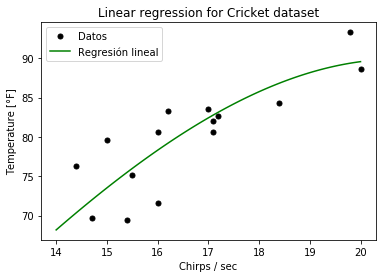

In [240]:
# Obtener la solución de regresión lineal con minimus cuadrados regularizados (p=2)
X = phi(x)
p = 10
theta = np.linalg.solve(X.T.dot(X) + p*np.identity(X.shape[1]), X.T).dot(y)
print('Theta:', theta)
print('Error:', ((y - X.dot(theta))**2).sum())

# Mostrar la regresión
x_reg = np.linspace(14, 20, 100)
y_reg = phi(x_reg).dot(theta)

plt.plot(x, y, 'o', c='black', ms=5, label='Datos')
plt.plot(x_reg, y_reg, c='green', label='Regresión lineal')
plt.legend()
plt.xlabel('Chirps / sec')
plt.ylabel('Temperature [°F]')
plt.title('Linear regression for Cricket dataset')
plt.show()

theta_regularizado = theta

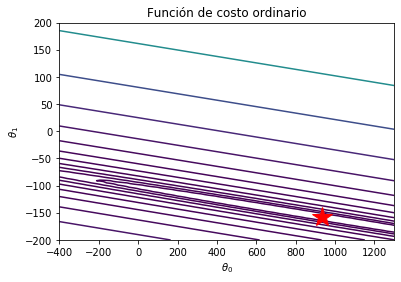

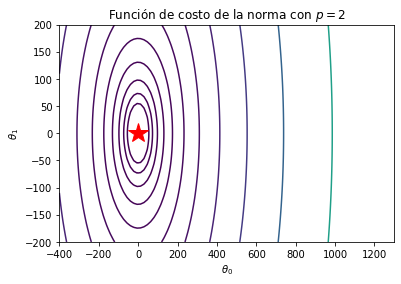

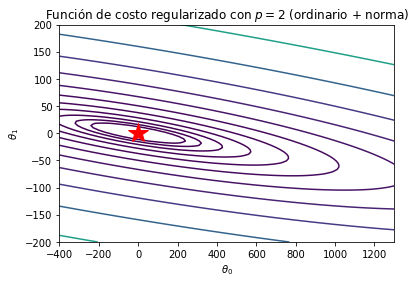

In [246]:
# Definir una función para mostrar 
def plot_función_de_costo(x, theta, dim1, dim2, dim1_range, dim2_range, cost, title=''):
    X = phi(x)
    
    xs = np.linspace(dim1_range[0], dim1_range[1], 100)
    ys = np.linspace(dim2_range[0], dim2_range[1], 100)
    zs = np.empty((len(ys), len(xs)))
    for j, theta_dim2 in enumerate(ys):
        for i, theta_dim1 in enumerate(xs):
            theta_local = theta.copy()
            theta_local[dim1] = theta_dim1
            theta_local[dim2] = theta_dim2
            zs[j,i] = cost(X, theta_local)
    
    low = np.min(zs)
    high = np.max(zs)
    levels = np.exp(np.linspace(np.log(low), np.log(high), 20))[8:]
    
    plt.contour(xs, ys, zs, levels=levels)
    plt.plot(theta[dim1], theta[dim2], 'r*', ms=20)
    plt.xlabel('$\\theta_%d$' % dim1)
    plt.ylabel('$\\theta_%d$' % dim2)
    plt.title(title)
    plt.show()

# Mostrar las funciónes de costo para minimus cuadrados ordinario, el termino de regularización,
# y minimus cuadrados regularizados
plot_función_de_costo(x, theta_ordinario, 0, 1, [-400, 1300], [-200, 200],
                      lambda X, theta: 0.5 * ((y - X.dot(theta))**2).sum(),
                      title='Función de costo ordinario')

plot_función_de_costo(x, theta_regularizado, 0, 1, [-400, 1300], [-200, 200],
                      lambda X, theta: p/2*theta.T.dot(theta),
                      title='Función de costo de la norma con $p=2$')

plot_función_de_costo(x, theta_regularizado, 0, 1, [-400, 1300], [-200, 200],
                      lambda X, theta: 0.5 * ((y - X.dot(theta))**2).sum() + p/2*theta.T.dot(theta),
                      title='Función de costo regularizado con $p=2$ (ordinario + norma)')

## Nelson data set
Nelson es un data set de https://www.itl.nist.gov/div898/strd/nls/data/nelson.shtml con contiene datos de un tipo de componente electronico, que está medida por temperatura por semana.

y = dialectric breakdown strength

x1 = time in weeks

x2 = temperature in degrees Celcius

Theta: [-1.59648371e+01  1.81936420e-01  3.22800412e-01 -1.58380659e-03
  1.64063818e-03 -8.20535818e-04]
Error: 328.56018847813124


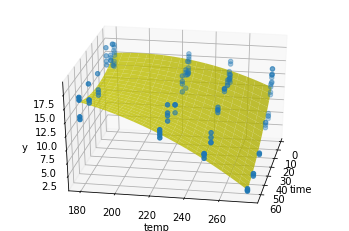

In [248]:
from mpl_toolkits.mplot3d import Axes3D

# Cargar los datos
data = np.loadtxt('nelson.txt', skiprows=1)
y = data[:,0]
x = data[:,1:]

# Definir nuestro 𝜙 para dos dimensiones de enrada
def phi(x):
    # será: A + B*x1 + C*x2 + D*x1*x2 + E*x1^2 + F*x2^2
    return np.array([
        np.ones(x.shape[0]), x[:,0], x[:,1], x[:,0] * x[:,1], x[:,0]**2, x[:,1]**2
    ]).T

# Obtener la solución de regresión lineal
p = 0
X = phi(x)
theta = np.linalg.solve(X.T.dot(X) + p*np.identity(X.shape[1]), X.T).dot(y)
print('Theta:', theta)
print('Error:', ((y - X.dot(theta))**2).sum())

# Mostrar los datos y la regresión
N = 20
M = 20
x_grid = np.linspace(np.min(x[:,0]), np.max(x[:,0]), N)
y_grid = np.linspace(np.min(x[:,1]), np.max(x[:,1]), M)

x_reg = np.empty((N*M,2))
for j, yv in enumerate(y_grid):
    for i, xv in enumerate(x_grid):
        x_reg[j*N+i,0] = xv
        x_reg[j*N+i,1] = yv

z_reg = phi(x_reg).dot(theta)

xs, ys = np.meshgrid(x_grid, y_grid)
zs = np.empty((M, N))
for j in range(M):
    for i in range(N):
        zs[j, i] = z_reg[j*N+i]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)
ax.plot_surface(xs, ys, zs, alpha=0.8, color='yellow')

ax.set_xlabel('time')
ax.set_ylabel('temp')
ax.set_zlabel('y')

ax.view_init(30, 10)
plt.draw()